In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import smartlab as sl
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
import matplotlib
import seaborn

titlesize = 24
labelsize = 22
legendsize = 16
xticksize = yticksize = 18

matplotlib.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
matplotlib.rcParams['legend.handletextpad'] = 0.5
matplotlib.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
matplotlib.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'
matplotlib.rcParams['axes.labelsize'] = labelsize
matplotlib.rcParams['axes.titlesize'] = titlesize

matplotlib.rc('xtick', labelsize=xticksize)
matplotlib.rc('ytick', labelsize=yticksize)
matplotlib.rc('legend', fontsize=legendsize)

matplotlib.rc('font', **{'family':'serif'})
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
matplotlib.rc('text.latex', preamble=r'\usepackage[english]{babel}')
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath}')

%matplotlib inline

In [28]:
cds = pd.read_csv('CdS.tsv', delimiter='\t')
cdse = pd.read_csv('CdSe.tsv', delimiter='\t')

cds['$U_n,\ mV$'] = np.round(cds.iloc[:, 1] / cds.iloc[:, 3], 2)
cdse['$U_n,\ mV$'] = np.round(cdse.iloc[:, 1] / cdse.iloc[:, 3], 2)

In [29]:
cds.head()

,"$\phi,\ \circ$","$U,\ mV$","$\lambda,\ nm$",$N$,"$U_n,\ mV$"
0,3500.0,14.1,1000.0,46.8,0.30
1,3450.0,50.4,970.0,45.0,1.12
2,3425.0,78.0,955.0,44.3,1.76
3,3400.0,109.0,940.0,43.6,2.50
4,3375.0,135.0,928.0,43.0,3.14


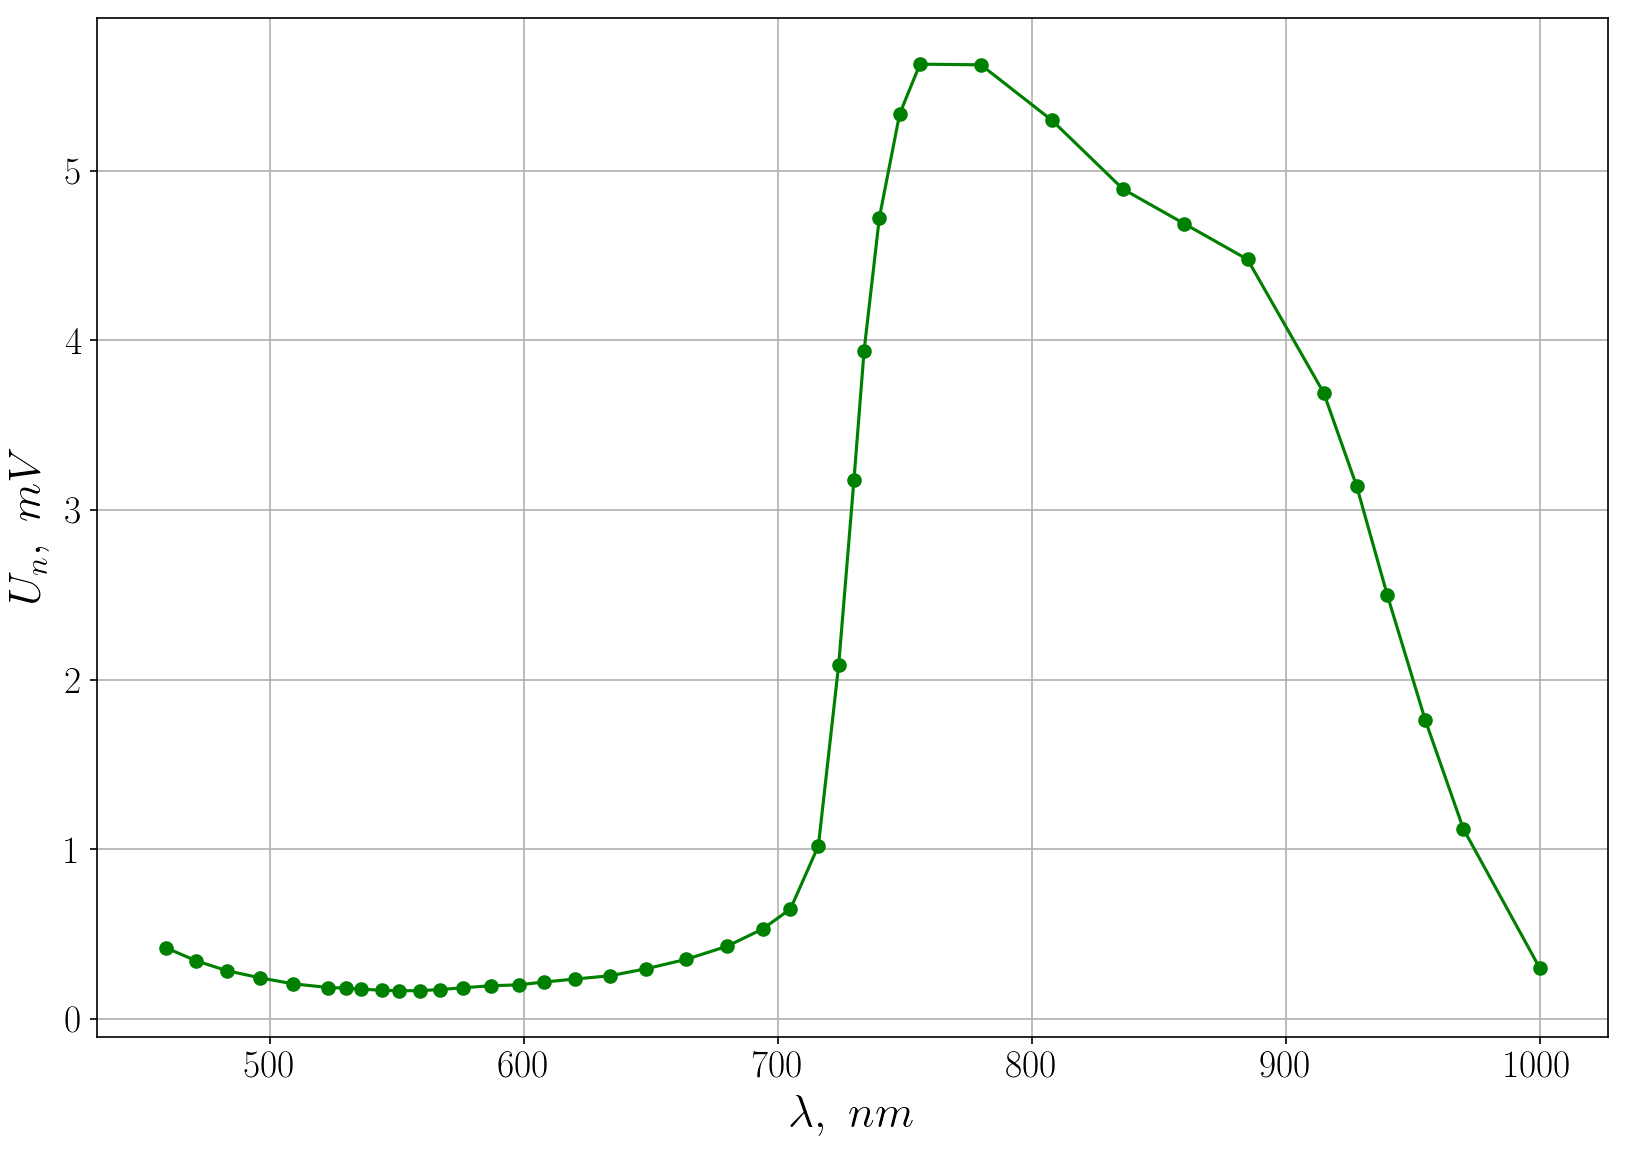

In [24]:
plt.figure(figsize=(13, 9), dpi=150)
plt.plot(cds.iloc[:, 2], cds.iloc[:, 4], '-go')
# plt.plot(x, f(x), '-go')
plt.xlabel('$\lambda,\ nm$')
plt.ylabel('$U_n,\ mV$')
plt.grid()
plt.savefig('cds.png')

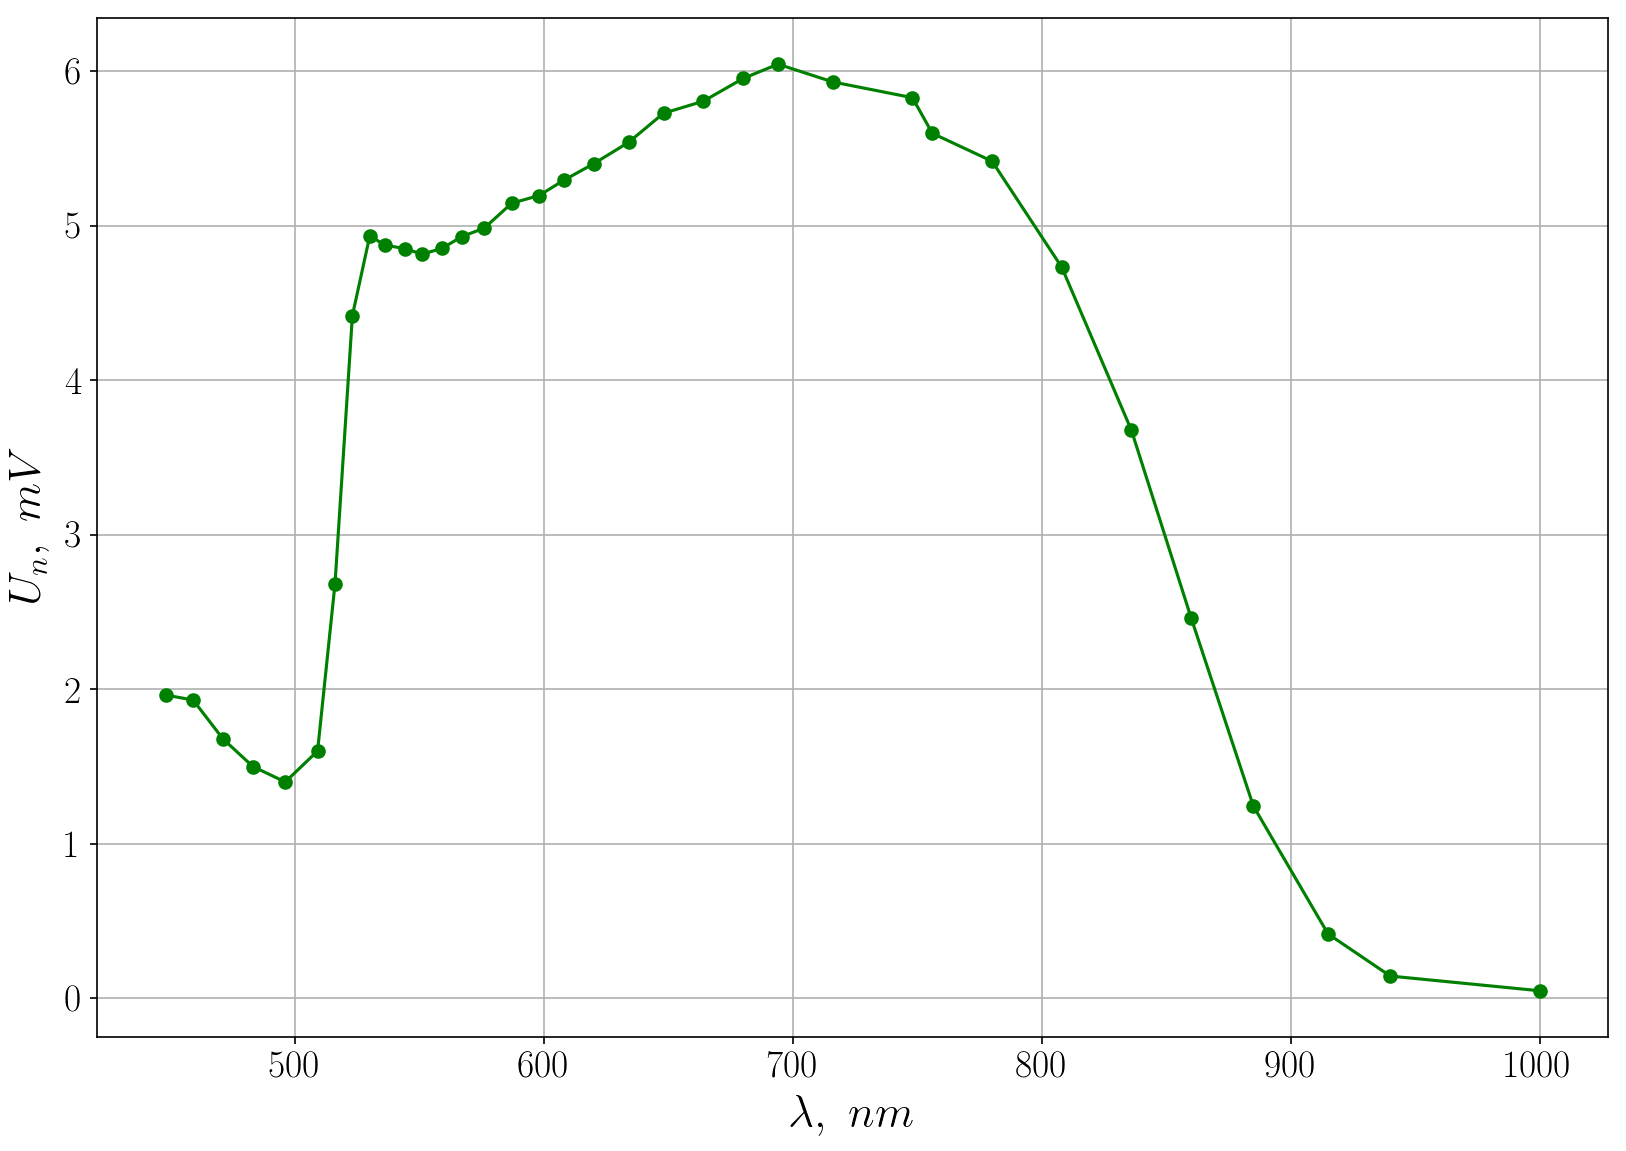

In [25]:
plt.figure(figsize=(13, 9), dpi=150)
plt.plot(cdse.iloc[:, 2], cdse.iloc[:, 4], '-go')
# plt.plot(x, f(x), '-go')
plt.xlabel('$\lambda,\ nm$')
plt.ylabel('$U_n,\ mV$')
plt.grid()
plt.savefig('cdse.png')

In [30]:
sl.table(cds)

\begin{tabular}{rrrrr}\\
$\phi,\ \circ$ & $U,\ mV$ & $\lambda,\ nm$ & $N$ & $U_n,\ mV$\\ \hline
$3500.0$ & $14.1$ & $1000.0$ & $46.8$ & $0.3$ \\
$3450.0$ & $50.4$ & $970.0$ & $45.0$ & $1.12$ \\
$3425.0$ & $78.0$ & $955.0$ & $44.3$ & $1.76$ \\
$3400.0$ & $109.0$ & $940.0$ & $43.6$ & $2.5$ \\
$3375.0$ & $135.0$ & $928.0$ & $43.0$ & $3.14$ \\
$3350.0$ & $155.0$ & $915.0$ & $42.0$ & $3.69$ \\
$3300.0$ & $180.0$ & $885.0$ & $40.2$ & $4.48$ \\
$3250.0$ & $181.0$ & $860.0$ & $38.6$ & $4.69$ \\
$3200.0$ & $181.0$ & $836.0$ & $37.0$ & $4.89$ \\
$3150.0$ & $187.0$ & $808.0$ & $35.3$ & $5.3$ \\
$3100.0$ & $189.0$ & $780.0$ & $33.6$ & $5.62$ \\
$3050.0$ & $179.0$ & $756.0$ & $31.8$ & $5.63$ \\
$3035.0$ & $167.0$ & $748.0$ & $31.3$ & $5.34$ \\
$3015.0$ & $145.0$ & $740.0$ & $30.7$ & $4.72$ \\
$3000.0$ & $119.0$ & $734.0$ & $30.2$ & $3.94$ \\
$2990.0$ & $95.0$ & $730.0$ & $29.9$ & $3.18$ \\
$2975.0$ & $61.0$ & $724.0$ & $29.2$ & $2.09$ \\
$2950.0$ & $29.1$ & $716.0$ & $28.5$ & $1.02$ \\
$2925.0$ & $

In [31]:
sl.table(cdse)

\begin{tabular}{rrrrr}\\
$\phi,\ \circ$ & $U,\ mV$ & $\lambda,\ nm$ & $N$ & $U_n,\ mV$\\ \hline
$3500.0$ & $2.29$ & $1000.0$ & $46.8$ & $0.05$ \\
$3400.0$ & $6.15$ & $940.0$ & $42.7$ & $0.14$ \\
$3350.0$ & $17.5$ & $915.0$ & $42.0$ & $0.42$ \\
$3300.0$ & $50.0$ & $885.0$ & $40.2$ & $1.24$ \\
$3250.0$ & $95.0$ & $860.0$ & $38.6$ & $2.46$ \\
$3200.0$ & $136.0$ & $836.0$ & $37.0$ & $3.68$ \\
$3150.0$ & $167.0$ & $808.0$ & $35.3$ & $4.73$ \\
$3100.0$ & $182.0$ & $780.0$ & $33.6$ & $5.42$ \\
$3050.0$ & $178.0$ & $756.0$ & $31.8$ & $5.6$ \\
$3000.0$ & $176.0$ & $748.0$ & $30.2$ & $5.83$ \\
$2950.0$ & $169.0$ & $716.0$ & $28.5$ & $5.93$ \\
$2900.0$ & $162.0$ & $694.0$ & $26.8$ & $6.04$ \\
$2850.0$ & $150.0$ & $680.0$ & $25.2$ & $5.95$ \\
$2800.0$ & $137.0$ & $664.0$ & $23.6$ & $5.81$ \\
$2750.0$ & $126.0$ & $648.0$ & $22.0$ & $5.73$ \\
$2700.0$ & $113.0$ & $634.0$ & $20.4$ & $5.54$ \\
$2650.0$ & $101.0$ & $620.0$ & $18.7$ & $5.4$ \\
$2600.0$ & $90.0$ & $608.0$ & $17.0$ & $5.29$ \\
$2550.0$ & 